In [431]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [432]:
#charger les données
#https://www.kaggle.com/sidtwr/videogames-sales-dataset
dataset = 'PS4_GamesSales.csv'
df = pd.read_csv(dataset, encoding = 'latin-1')
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [433]:
df.shape

(1034, 9)

In [434]:
df.dtypes

Game              object
Year             float64
Genre             object
Publisher         object
North America    float64
Europe           float64
Japan            float64
Rest of World    float64
Global           float64
dtype: object

In [435]:
df.tail()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.0,0.0,0.0,0.0,0.0
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.0,0.0,0.0,0.0,0.0
1031,The Mummy Demastered,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0
1033,Battle Chef Brigade,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0


On constate qu'il y a des jeux sans année et sans éditeur, on supprime donc les jeux du dataset où ces valeurs manquent

In [436]:
df.isna().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [437]:
df = df.dropna()

In [438]:
df.shape

(825, 9)

In [439]:
df.tail()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
1025,Biomutant,2019.0,Action,THQ Nordic,0.0,0.0,0.0,0.0,0.0
1026,de Blob,2017.0,Platform,THQ Nordic,0.0,0.0,0.0,0.0,0.0
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.0,0.0,0.0,0.0,0.0
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.0,0.0,0.0,0.0,0.0
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.0,0.0,0.0,0.0,0.0


On convertit la date en datetime

In [440]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [441]:
df.dtypes

Game                     object
Year             datetime64[ns]
Genre                    object
Publisher                object
North America           float64
Europe                  float64
Japan                   float64
Rest of World           float64
Global                  float64
dtype: object

In [442]:
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014-01-01,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015-01-01,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018-01-01,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017-01-01,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017-01-01,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [443]:
df.tail()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
1025,Biomutant,2019-01-01,Action,THQ Nordic,0.0,0.0,0.0,0.0,0.0
1026,de Blob,2017-01-01,Platform,THQ Nordic,0.0,0.0,0.0,0.0,0.0
1027,Chaos on Deponia,2017-01-01,Adventure,Daedalic Entertainment,0.0,0.0,0.0,0.0,0.0
1028,Code Vein,2018-01-01,Action,Bandai Namco Entertainment,0.0,0.0,0.0,0.0,0.0
1030,Radial G Racing Revolved,2017-01-01,Racing,Tammeka Games,0.0,0.0,0.0,0.0,0.0


## Problématique : Existe-t-il une région plus propice à la vente d'un jeu

On met au point notre premier diagramme
Dans ce diagramme on cherche à voir les nombres de ventes atteint par les jeux

In [444]:
serie = df['Global']
n = serie.count()
n_bins = np.sqrt(n).astype(int)

(array([645.,  70.,  33.,  17.,  17.,  12.,   8.,   2.,   4.,   3.,   2.,
          2.,   3.,   0.,   1.,   1.,   0.,   1.,   0.,   1.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.    ,  0.6925,  1.385 ,  2.0775,  2.77  ,  3.4625,  4.155 ,
         4.8475,  5.54  ,  6.2325,  6.925 ,  7.6175,  8.31  ,  9.0025,
         9.695 , 10.3875, 11.08  , 11.7725, 12.465 , 13.1575, 13.85  ,
        14.5425, 15.235 , 15.9275, 16.62  , 17.3125, 18.005 , 18.6975,
        19.39  ]),
 <BarContainer object of 28 artists>)

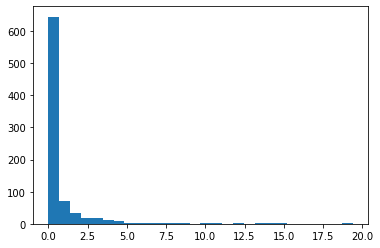

In [445]:
plt.hist(serie,
        bins=n_bins)

On constate que la majorité des jeux ont des ventes faibles aux alentours de 0, on va essayer de modifier l'échelle pour en voir plus

In [446]:
bins = np.arange(0., 25., 5)
bins.shape

(5,)

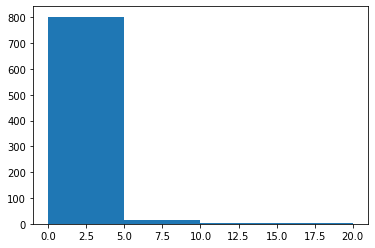

In [447]:
plt.hist(serie,
        bins=bins);

In [448]:
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014-01-01,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015-01-01,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018-01-01,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017-01-01,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017-01-01,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


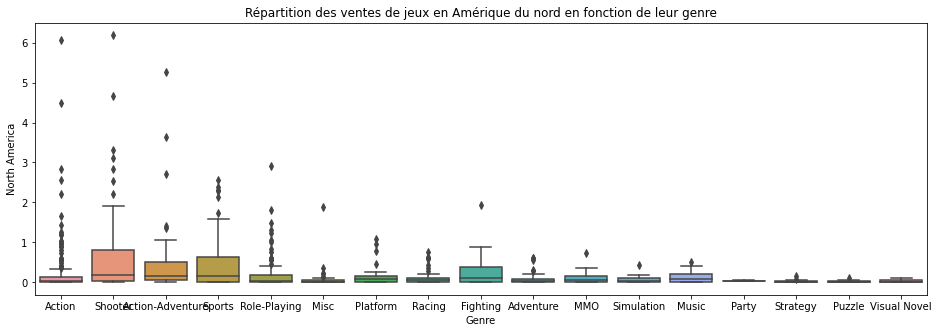

In [449]:
plt.figure(figsize=(16,5))
sns.boxplot(x='Genre',
          y='North America',
           data=df)
plt.title("Répartition des ventes de jeux en Amérique du nord en fonction de leur genre")
plt.show()

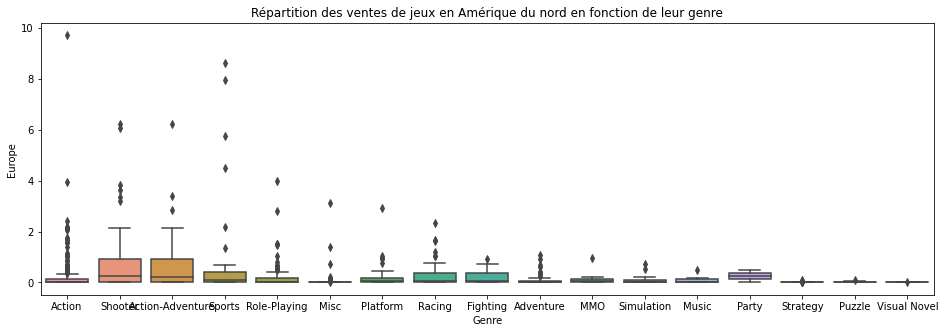

In [450]:
plt.figure(figsize=(16,5))
sns.boxplot(x='Genre',
          y='Europe',
           data=df)
plt.title("Répartition des ventes de jeux en Amérique du nord en fonction de leur genre")
plt.show()

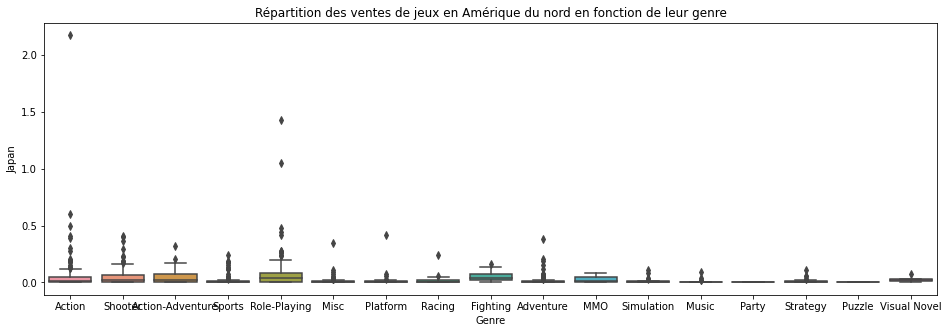

In [451]:
plt.figure(figsize=(16,5))
sns.boxplot(x='Genre',
          y='Japan',
           data=df)
plt.title("Répartition des ventes de jeux en Amérique du nord en fonction de leur genre")
plt.show()

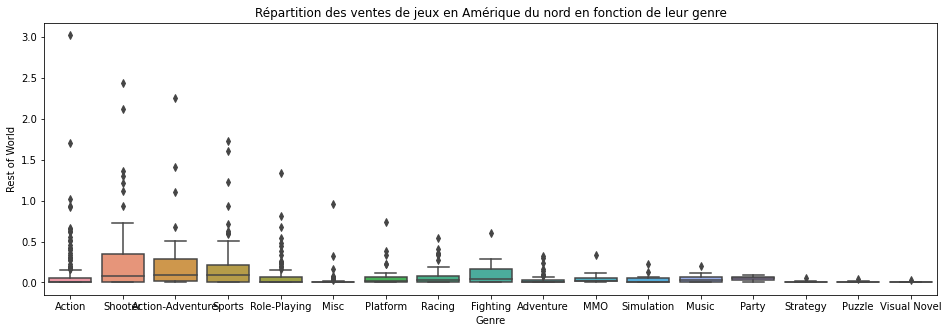

In [452]:
plt.figure(figsize=(16,5))
sns.boxplot(x='Genre',
          y='Rest of World',
           data=df)
plt.title("Répartition des ventes de jeux en Amérique du nord en fonction de leur genre")
plt.show()

On peut voir sur les boîtes à moustache que certains genres semblent être plus attrayant pour les consommateurs en fonction de la région où ils se situent

In [453]:
df = df.drop(['Game','Year','Genre','Publisher'], axis='columns')

<AxesSubplot:>

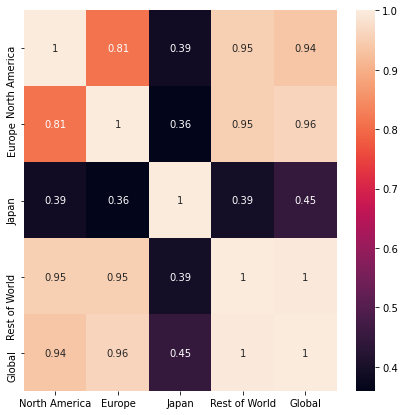

In [454]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True)

Sur cette HeatMap, on constate que les ventes global d'un jeu ont l'air de corréler avec les ventes en Amérique du Nord et en Europe, en revanche elles correllent assez peu avec les ventes du Japon et du reste du monde

In [455]:
df.head()

,North America,Europe,Japan,Rest of World,Global
0,6.06,9.71,0.60,3.02,19.39
1,6.18,6.05,0.41,2.44,15.09
2,5.26,6.21,0.21,2.26,13.94
3,4.67,6.21,0.40,2.12,13.40
4,1.27,8.64,0.15,1.73,11.80


In [456]:
df.head()

,North America,Europe,Japan,Rest of World,Global
0,6.06,9.71,0.60,3.02,19.39
1,6.18,6.05,0.41,2.44,15.09
2,5.26,6.21,0.21,2.26,13.94
3,4.67,6.21,0.40,2.12,13.40
4,1.27,8.64,0.15,1.73,11.80


Déterminons nos variable X (les features) et nos variables Y (La target)

In [471]:
X = df[['North America','Europe', 'Japan','Rest of World']]
Y = df['Global']

In [472]:
X

,North America,Europe,Japan,Rest of World
0,6.06,9.71,0.60,3.02
1,6.18,6.05,0.41,2.44
2,5.26,6.21,0.21,2.26
3,4.67,6.21,0.40,2.12
4,1.27,8.64,0.15,1.73
...,...,...,...,...
1025,0.00,0.00,0.00,0.00
1026,0.00,0.00,0.00,0.00
1027,0.00,0.00,0.00,0.00
1028,0.00,0.00,0.00,0.00


In [473]:
Y

0       19.39
1       15.09
2       13.94
3       13.40
4       11.80
        ...  
1025     0.00
1026     0.00
1027     0.00
1028     0.00
1030     0.00
Name: Global, Length: 825, dtype: float64

On split nos données pour avoir des données de test et des données d'entraînement, cela nous permettra de savoir si notre algorithme est efficace

In [474]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [475]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((577, 4), (577,), (248, 4), (248,))

In [476]:
X_train

,North America,Europe,Japan,Rest of World
220,0.10,0.30,0.02,0.07
1016,0.00,0.00,0.00,0.00
329,0.11,0.06,0.00,0.04
132,0.49,0.43,0.01,0.18
817,0.00,0.00,0.00,0.00
...,...,...,...,...
71,1.58,0.25,0.00,0.41
106,0.61,0.51,0.12,0.23
270,0.12,0.13,0.00,0.05
435,0.04,0.04,0.00,0.02


## Entraînons notre algorithme

In [477]:
clf = LinearRegression()

In [478]:
lin = clf.fit(X_train, Y_train)

In [479]:
print('Coef : ',lin.coef_)
print('Intercept : ',lin.intercept_)

Coef :  [1.12821592 1.09334429 0.9975151  0.44392399]
Intercept :  0.00020291092247370912


On remarque un coefficient fort pour l'Amérique du Nord et l'Europe indiquant une corrélation forte ces deux régions et le nombre total de ventes, tandis que pour le Japon et le Reste du Monde ce coefficient est plus faible

In [466]:
lin.score(X,Y)

0.9960105579749524

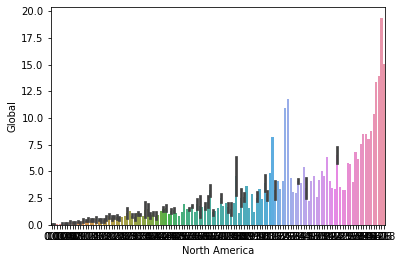

In [467]:
ax = sns.barplot(x="North America", y="Global", data=df)

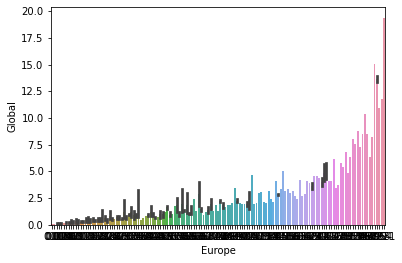

In [468]:
ax = sns.barplot(x="Europe", y="Global", data=df)

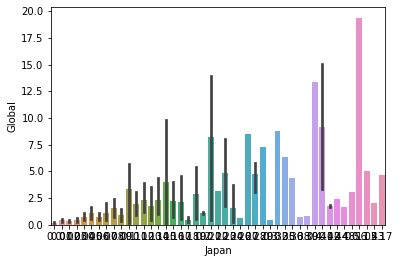

In [469]:
ax = sns.barplot(x="Japan", y="Global", data=df)

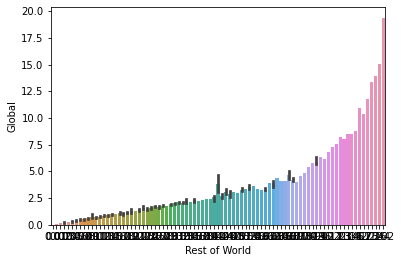

In [470]:
ax = sns.barplot(x="Rest of World", y="Global", data=df)